In [1]:
from datasets import load_dataset
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

# Import libraries for text processing
from textblob import TextBlob
import re


C:\Users\megau\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from datasets import load_dataset
import pandas as pd

# load the dataset
mbr_data = load_dataset('recmeapp/mobilerec', data_dir='interactions')
mbr_meta = load_dataset('recmeapp/mobilerec', data_dir='app_meta')

mbr_data['train'].to_csv('./mbr_data.csv')

mobilerec_df = pd.read_csv('./mbr_data.csv')

print(f'There are {len(mobilerec_df)} interactions in mobilerec dataset.')

print(f'There are {len(mobilerec_df["app_package"].unique())} unique apps in mobilerec dataset.')

print(f'There are {len(mobilerec_df["uid"].unique())} unique users in mobilerec dataset.')

print(f'There are {len(mobilerec_df["app_category"].unique())} unique categories in mobilerec dataset.')

Creating CSV from Arrow format: 100%|██████████| 19298/19298 [03:21<00:00, 95.65ba/s] 


There are 19297019 interactions in mobilerec dataset.
There are 10173 unique apps in mobilerec dataset.
There are 700111 unique users in mobilerec dataset.
There are 48 unique categories in mobilerec dataset.


In [3]:
print(mobilerec_df.columns)

Index(['app_package', 'review', 'rating', 'votes', 'date', 'uid',
       'formated_date', 'unix_timestamp', 'app_category'],
      dtype='object')


In [4]:
# Get the total number of rows
total_rows = len(mobilerec_df)

# Calculate the number of rows in each split
rows_per_split = total_rows // 20

split_1 = mobilerec_df.iloc[:rows_per_split].copy()


In [5]:
import nltk

# Download the 'punkt' tokenizer and 'stopwords' corpus
nltk.download('all')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\megau\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\megau\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\megau\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\megau\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\megau\AppData\Roaming\nltk_data...
[

In [6]:
print(split_1[['review']].head())

                                              review
0                             It's really a fun game
1  uninstalling. it was ok but felt like it was c...
2                                     Love this game
3  Doesn't update play time. Just downloaded it 3...
4  app crashes every time I try to log in. what g...


In [7]:
def preprocess_review(text):
    if isinstance(text, str):
        text = text.lower()
        tokens = word_tokenize(re.sub(r'[^\w\s]', '', text))
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word not in stop_words]
        return filtered_tokens
    else:
        return []

split_1['processed_reviews'] = split_1['review'].apply(preprocess_review)

In [8]:
mobilerec_df['cleaned_review'] = split_1['processed_reviews']

In [9]:
import re
def clean_review(text):
    text = str(text).lower() 
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'\d+', '', text) 
    text = re.sub(r'\s+', ' ', text).strip()
    return text

mobilerec_df['cleaned_review'] = mobilerec_df['review'].apply(clean_review)

# Display the first few rows to check cleaned reviews
print(mobilerec_df[['review', 'cleaned_review']].head())

                                              review  \
0                             It's really a fun game   
1  uninstalling. it was ok but felt like it was c...   
2                                     Love this game   
3  Doesn't update play time. Just downloaded it 3...   
4  app crashes every time I try to log in. what g...   

                                      cleaned_review  
0                              its really a fun game  
1  uninstalling it was ok but felt like it was co...  
2                                     love this game  
3  doesnt update play time just downloaded it day...  
4  app crashes every time i try to log in what gives  


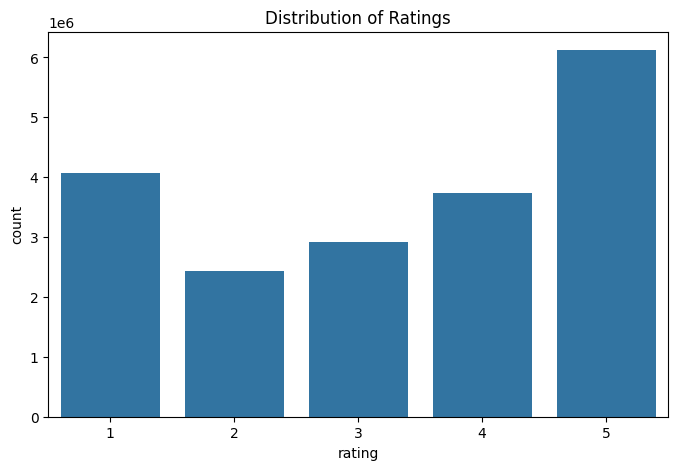

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=mobilerec_df)
plt.title('Distribution of Ratings')
plt.show()

In [11]:
def sentiment_score(review):
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 1  # Positive
    elif polarity == 0:
        return 0  # Neutral
    else:
        return -1  # Negative

In [12]:
mobilerec_df['sentiment_score'] = mobilerec_df['cleaned_review'].apply(sentiment_score)
print(mobilerec_df[['cleaned_review', 'sentiment_score']].head())

                                      cleaned_review  sentiment_score
0                              its really a fun game               -1
1  uninstalling it was ok but felt like it was co...                1
2                                     love this game                1
3  doesnt update play time just downloaded it day...                1
4  app crashes every time i try to log in what gives                0


In [17]:
#print(mobilerec_df['rating'])
#print(mobilerec_df['sentiment_score'])
print(mobilerec_df['app_category'])

0                            Casual
1                  Health & Fitness
2                              Word
3                     Entertainment
4                            Dating
                     ...           
19297014                  Education
19297015                     Action
19297016    Video Players & Editors
19297017                  Adventure
19297018           Health & Fitness
Name: app_category, Length: 19297019, dtype: object


In [18]:
app_avg = mobilerec_df.groupby('app_category').agg(avg_sentiment=('sentiment_score', 'mean'), avg_rating=('rating', 'mean')).reset_index()

print(app_avg.head())


      app_category  avg_sentiment  avg_rating
0           Action       0.255385    3.226206
1        Adventure       0.305342    3.426523
2           Arcade       0.295847    3.316240
3     Art & Design       0.537340    3.314406
4  Auto & Vehicles       0.469631    3.357015


In [19]:
from scipy.stats import pearsonr

#Pearson correlation coefficient
corr, _ = pearsonr(app_avg['avg_sentiment'], app_avg['avg_rating'])

print("Pearson correlation between average sentiment and average rating per app:", corr)


Pearson correlation between average sentiment and average rating per app: 0.0767479419692765


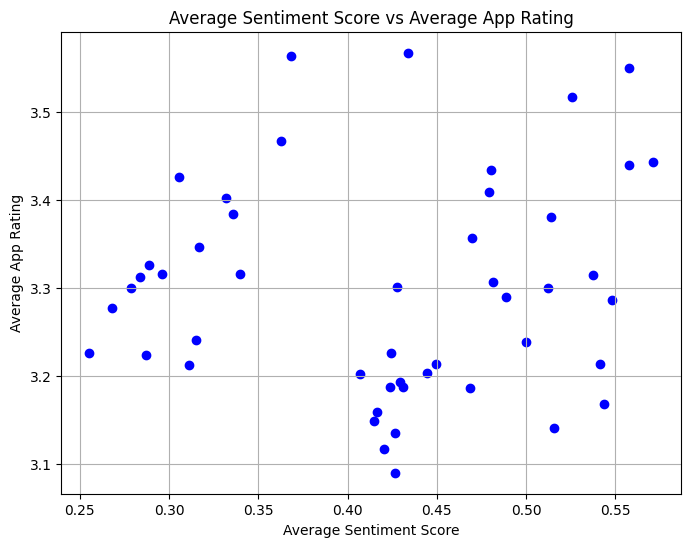

In [20]:
import matplotlib.pyplot as plt

# Scatter plot for average sentiment and average rating
plt.figure(figsize=(8, 6))
plt.scatter(app_avg['avg_sentiment'], app_avg['avg_rating'], color='b')
plt.title('Average Sentiment Score vs Average App Rating')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Average App Rating')
plt.grid(True)
plt.show()


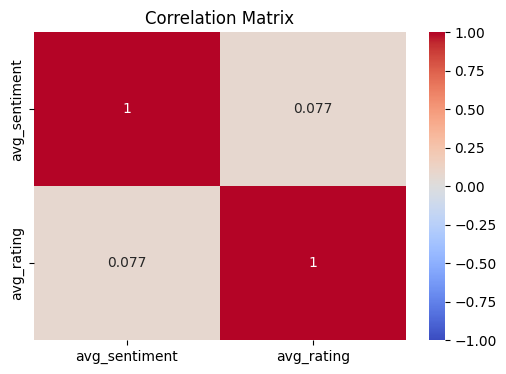

In [21]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = app_avg[['avg_sentiment', 'avg_rating']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [38]:
reviews_ratings_df = mobilerec_df[['review', 'rating']]
print(reviews_ratings_df.head())

                                              review  rating
0                             It's really a fun game       5
1  uninstalling. it was ok but felt like it was c...       2
2                                     Love this game       4
3  Doesn't update play time. Just downloaded it 3...       1
4  app crashes every time I try to log in. what g...       1


In [43]:
mobilerec_df[['review','rating','sentiment_score']].tail()

,review,rating,sentiment_score
19297014,I created an account and have been waiting in ...,1,0
19297015,I'm sure a lot of people will rate this higher...,3,1
19297016,It was cool for a while! but when i start to m...,5,1
19297017,The latest update has rolled everything back t...,1,1
19297018,Excellent,4,1


In [48]:
# Compute correlation
correlation = mobilerec_df[['rating', 'sentiment_score']].corr().iloc[0, 1]
print(f'Correlation between star ratings and sentiment scores: {correlation:.2f}')


Correlation between star ratings and sentiment scores: 0.42


In [56]:
mobilerec_df['rating_discretized'] = mobilerec_df['rating'].apply(lambda x: 1 if x > 3 else (-1 if x < 3 else 0))

# Calculate discrepancy
discrepancy = mobilerec_df['rating_discretized'] - mobilerec_df['sentiment_score']

# Print results
print("\nDiscrepancy:")
print(discrepancy)


Discrepancy:
0           2
1          -2
2           0
3          -2
4          -1
           ..
19297014   -1
19297015   -1
19297016    0
19297017   -2
19297018    0
Length: 19297019, dtype: int64


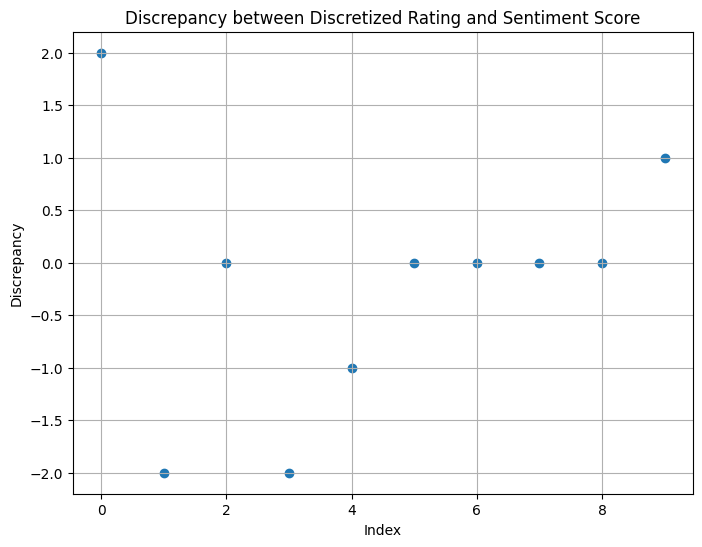

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(mobilerec_df.index[:10], discrepancy[:10]) 
plt.xlabel("Index")
plt.ylabel("Discrepancy")
plt.title("Discrepancy between Discretized Rating and Sentiment Score")
plt.grid(True)
plt.show()